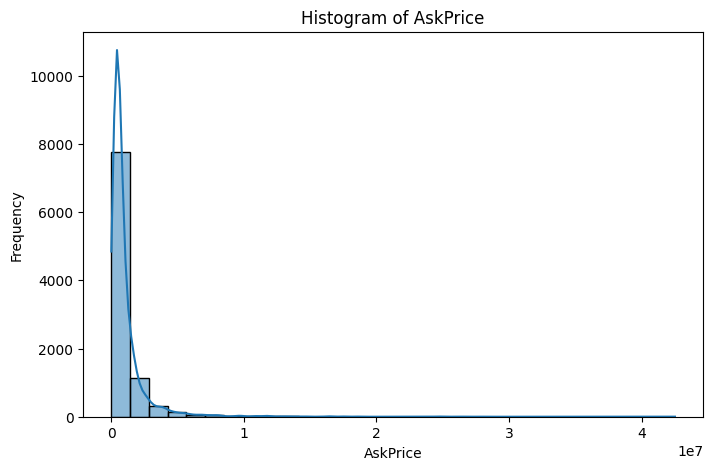

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load Dataset
file_path = 'used_car_dataset.csv'
data = pd.read_csv(file_path)

# Data Cleaning
def clean_data(df):
    # Remove non-numeric characters in kmDriven and AskPrice
    df['kmDriven'] = pd.to_numeric(df['kmDriven'].str.replace(',', '').str.replace(' km', ''), errors='coerce')
    df['AskPrice'] = pd.to_numeric(df['AskPrice'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
    # Drop rows with missing values
    df.dropna(subset=['kmDriven', 'AskPrice'], inplace=True)
    return df

data = clean_data(data)

# Histogram Plot
def plot_histogram(df, column):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

plot_histogram(data, 'AskPrice')




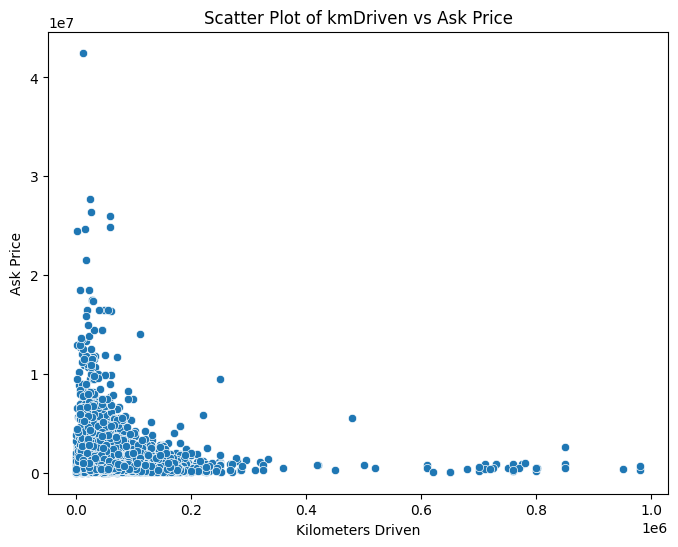

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot (AskPrice vs kmDriven)
def plot_scatter():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='kmDriven', y='AskPrice', data=data)
    plt.title('Scatter Plot of kmDriven vs Ask Price')
    plt.xlabel('Kilometers Driven')
    plt.ylabel('Ask Price')
    plt.show()

plot_scatter()



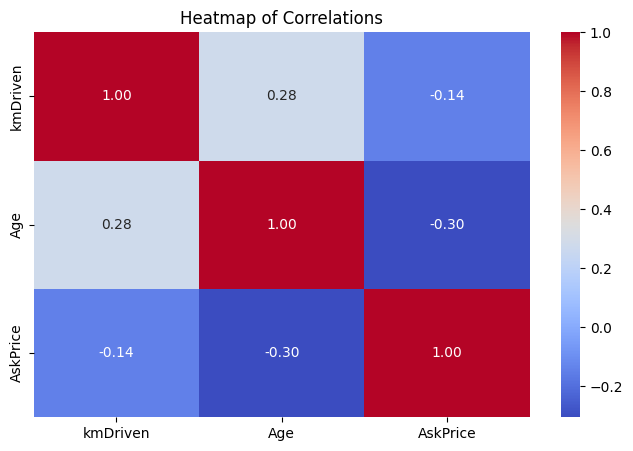

In [23]:
# Heatmap
def plot_heatmap(df):
    plt.figure(figsize=(8, 5))
    corr = df[['kmDriven', 'Age', 'AskPrice']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Heatmap of Correlations")
    plt.show()

plot_heatmap(data)

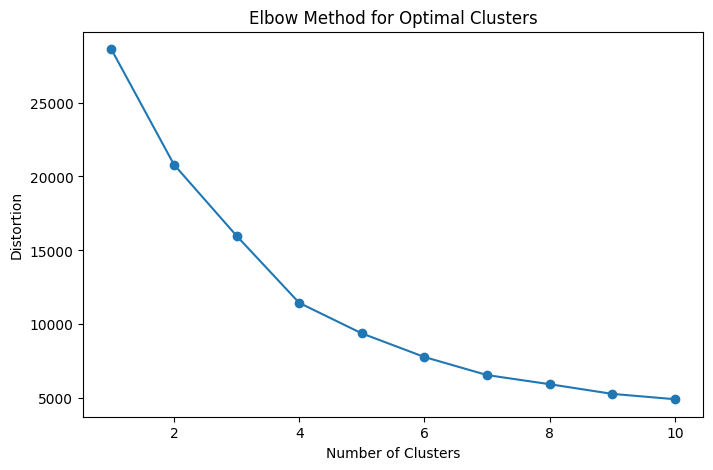

In [10]:
# Elbow Method for K-Means
def plot_elbow_method(df, features, max_clusters=10):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[features])
    distortions = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.title("Elbow Method for Optimal Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion")
    plt.show()

plot_elbow_method(data, ['kmDriven', 'Age', 'AskPrice'])

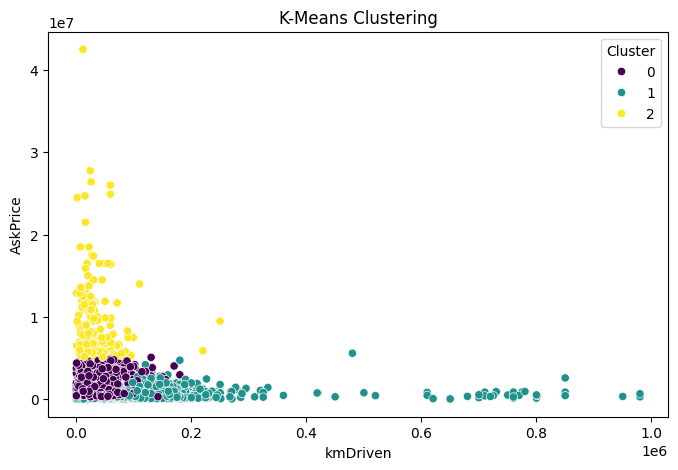

In [11]:
# K-Means Clustering
def perform_kmeans(df, features, n_clusters=3):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[features])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(scaled_data)
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='kmDriven', y='AskPrice', hue='Cluster', palette='viridis')
    plt.title("K-Means Clustering")
    plt.xlabel('kmDriven')
    plt.ylabel('AskPrice')
    plt.legend(title='Cluster')
    plt.show()

perform_kmeans(data, ['kmDriven', 'Age', 'AskPrice'])

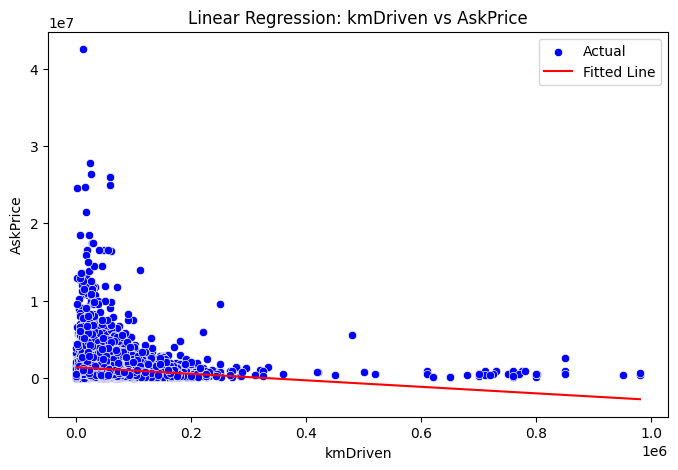

Linear Regression Coefficients: [-4.21060789]
Intercept: 1364455.1743558121


In [12]:
# Linear Regression Fitting
def perform_regression(df, x_column, y_column):
    model = LinearRegression()
    X = df[[x_column]]
    y = df[y_column]
    model.fit(X, y)
    df['PredictedPrice'] = model.predict(X)
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=x_column, y=y_column, data=df, label='Actual', color='blue')
    sns.lineplot(x=x_column, y='PredictedPrice', data=df, label='Fitted Line', color='red')
    plt.title(f"Linear Regression: {x_column} vs {y_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()
    print(f"Linear Regression Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")

perform_regression(data, 'kmDriven', 'AskPrice')

In [13]:
describe_data=data.describe()
print(describe_data)

              Year          Age       kmDriven      AskPrice      Cluster  \
count  9535.000000  9535.000000    9535.000000  9.535000e+03  9535.000000   
mean   2016.375669     7.624331   70605.891453  1.067161e+06     0.487992   
std       4.071090     4.071090   56308.596299  1.661675e+06     0.548122   
min    1986.000000     0.000000       0.000000  1.500000e+04     0.000000   
25%    2014.000000     5.000000   43000.000000  3.650000e+05     0.000000   
50%    2017.000000     7.000000   65000.000000  5.999990e+05     0.000000   
75%    2019.000000    10.000000   86000.000000  1.140000e+06     1.000000   
max    2024.000000    38.000000  980002.000000  4.250000e+07     2.000000   

       PredictedPrice  
count    9.535000e+03  
mean     1.067161e+06  
std      2.370934e+05  
min     -2.761949e+06  
25%      1.002343e+06  
50%      1.090766e+06  
75%      1.183399e+06  
max      1.364455e+06  
